# Deep Learning - GANs e Deep Fakes

### Demo - Implementações de GANs padrão usando camadas totalmente conectadas e a biblioteca Keras (Dataset MNIST - Dígitos Manuscritos)

- Dados

Redimensionando as imagens MNIST entre -1 e 1.

- Gerador

Rede neural simples totalmente conectada, ativação LeakyReLU e BatchNormalization.

A entrada para o gerador é chamada de 'amostra latente' (100 valores), que é uma série de números gerados aleatoriamente, e produz 784 (= 28x28) pontos de dados que representam uma imagem de dígito. Utilizaremos a distribuição normal.

A última ativação é tanh.

- Discriminador

Rede neural simples totalmente conectada e ativação LeakyReLU.

A última ativação é sigmóide.

- Perda

binary_crossentropy

- Otimizador

Adam (lr = 0,0002, beta_1 = 0,5) batch_size = 64 épocas = 100



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras import initializers

2023-02-09 19:14:49.349055: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Carregando nosso dataset

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 9s 1us/step


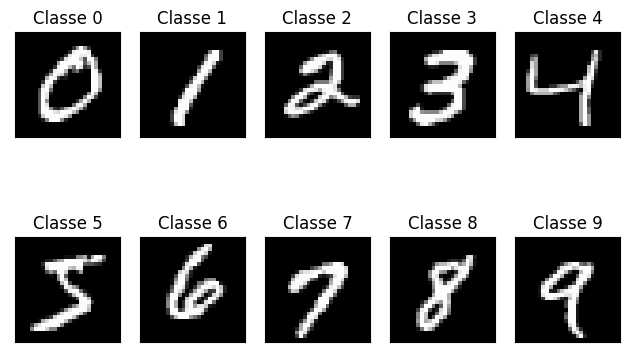

In [4]:
fig = plt.figure()
for i in range(10):
    plt.subplot(2, 5, i + 1)
    x_y = X_train[y_train == i]
    plt.imshow(x_y[0], cmap="gray", interpolation="none")
    plt.title("Classe %d" % (i))
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()

In [5]:
print("X_train.shape", X_train.shape)

# Transformando nossas imagens de entrada

X_train = X_train.reshape(60000, 28 * 28)

# Normalizando nossas entradas entre (-1, 1)

X_train = (X_train.astype("float32") / 255 - 0.5) * 2

print("X_train reshape:", X_train.shape)

X_train.shape (60000, 28, 28)
X_train reshape: (60000, 784)


In [6]:
# Dimensão de espaço latente

latent_dim = 100

# Dimensão da imagem 28x28

img_dim = 784

init = initializers.RandomNormal(stddev=0.02)

# Rede geradora

generator = Sequential()

# Camada de entra e camada escondida 1

generator.add(Dense(128, input_shape=(latent_dim,), kernel_initializer=init))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada escondida 2

generator.add(Dense(256))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada escondida 3

generator.add(Dense(512))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization(momentum=0.8))

# Camada de saída (output)

generator.add(Dense(img_dim, activation="tanh"))

2023-02-09 19:22:12.756129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
# Printando nosso sumário

generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 256)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                        

In [8]:
# Rede Discriminadora (Discriminator)
discriminator = Sequential()

# Camada de Entrada (Input) e Camada Escondida 1
discriminator.add(Dense(128, input_shape=(img_dim,), kernel_initializer=init))
discriminator.add(LeakyReLU(alpha=0.2))

# Camada Escondida 2
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(alpha=0.2))

# Camada Escondida 3
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(alpha=0.2))

# Camada de Saída (Output)
discriminator.add(Dense(1, activation="sigmoid"))

/Users/henricobela/opt/anaconda3/envs/tf-env/lib/python3.8/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [9]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [10]:
# Otimizador

optimizer = Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(
    optimizer=optimizer, loss="binary_crossentropy", metrics=["binary_accuracy"]
)

/Users/henricobela/opt/anaconda3/envs/tf-env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
discriminator.trainable = False

d_g = Sequential()
d_g.add(generator)
d_g.add(discriminator)
d_g.compile(
    optimizer=optimizer, loss="binary_crossentropy", metrics=["binary_accuracy"]
)

In [12]:
# Printando um sumário de nosso modelo
d_g.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 784)               583312    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 265601    
                                                                 
Total params: 848,913
Trainable params: 581,520
Non-trainable params: 267,393
_________________________________________________________________


epoca = 1/40, d_loss=0.615, g_loss=1.151                                                                                                                      
1/1 [==============================] - 0s 10ms/step


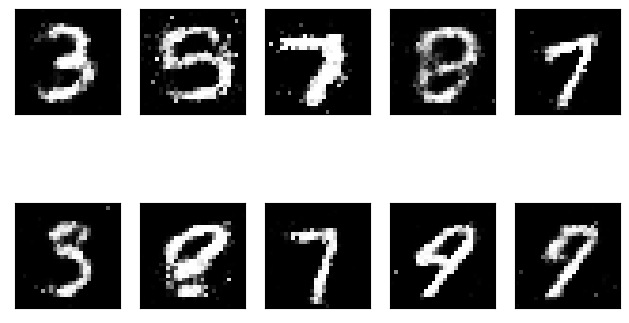

epoca = 2/40, d_loss=0.607, g_loss=1.115                                                                                                                      
epoca = 3/40, d_loss=0.621, g_loss=1.067                                                                                                                      
epoca = 4/40, d_loss=0.661, g_loss=1.066                                                                                                                      
epoca = 5/40, d_loss=0.605, g_loss=1.069                                                                                                                      
epoca = 6/40, d_loss=0.613, g_loss=1.086                                                                                                                      
epoca = 7/40, d_loss=0.567, g_loss=1.103                                                                                                                      
epoca = 8/40, d_loss=0.588, g_loss=1.188      

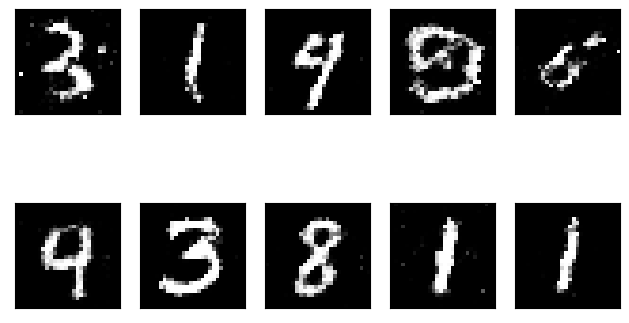

epoca = 12/40, d_loss=0.590, g_loss=1.175                                                                                                                      
epoca = 13/40, d_loss=0.604, g_loss=1.170                                                                                                                      
epoca = 14/40, d_loss=0.581, g_loss=1.156                                                                                                                      
epoca = 15/40, d_loss=0.593, g_loss=1.108                                                                                                                      
epoca = 16/40, d_loss=0.585, g_loss=1.206                                                                                                                      
epoca = 17/40, d_loss=0.592, g_loss=1.158                                                                                                                      
epoca = 18/40, d_loss=0.622, g_loss=1.21

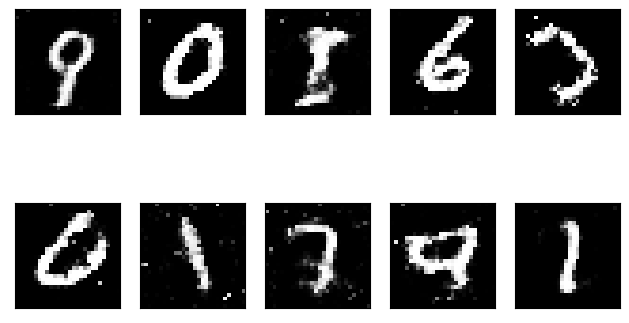

epoca = 22/40, d_loss=0.565, g_loss=1.319                                                                                                                      
epoca = 23/40, d_loss=0.612, g_loss=1.166                                                                                                                      
epoca = 24/40, d_loss=0.571, g_loss=1.275                                                                                                                      
epoca = 25/40, d_loss=0.571, g_loss=1.225                                                                                                                      
epoca = 26/40, d_loss=0.608, g_loss=1.174                                                                                                                      
epoca = 27/40, d_loss=0.566, g_loss=1.140                                                                                                                      
epoca = 28/40, d_loss=0.635, g_loss=1.19

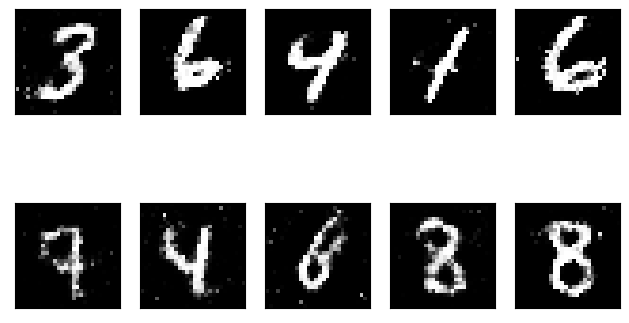

epoca = 32/40, d_loss=0.546, g_loss=1.301                                                                                                                      
epoca = 33/40, d_loss=0.584, g_loss=1.307                                                                                                                      
epoca = 34/40, d_loss=0.555, g_loss=1.311                                                                                                                      
epoca = 35/40, d_loss=0.538, g_loss=1.193                                                                                                                      
epoca = 36/40, d_loss=0.578, g_loss=1.203                                                                                                                      
epoca = 37/40, d_loss=0.609, g_loss=1.212                                                                                                                      
epoca = 38/40, d_loss=0.586, g_loss=1.21

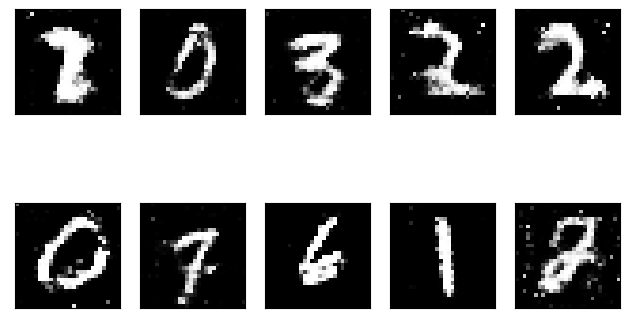

In [15]:
epochs = 40
batch_size = 64
smooth = 0.1

real = np.ones(shape=(batch_size, 1))
fake = np.zeros(shape=(batch_size, 1))

d_loss = []
d_g_loss = []

for e in range(epochs + 1):
    for i in range(len(X_train) // batch_size):
        discriminator.trainable = True

        X_batch = X_train[i * batch_size : (i + 1) * batch_size]
        d_loss_real = discriminator.train_on_batch(x=X_batch, y=real * (1 - smooth))

        z = np.random.normal(loc=0, scale=1, size=(batch_size, latent_dim))
        X_fake = generator.predict_on_batch(z)
        d_loss_fake = discriminator.train_on_batch(x=X_fake, y=fake)

        d_loss_batch = 0.5 * (d_loss_real[0] + d_loss_fake[0])

        discriminator.trainable = False
        d_g_loss_batch = d_g.train_on_batch(x=z, y=real)

        print(
            "epoca = %d/%d, batch = %d/%d, d_loss=%.3f, g_loss=%.3f"
            % (
                e + 1,
                epochs,
                i,
                len(X_train) // batch_size,
                d_loss_batch,
                d_g_loss_batch[0],
            ),
            100 * " ",
            end="\r",
        )

    d_loss.append(d_loss_batch)
    d_g_loss.append(d_g_loss_batch[0])
    print(
        "epoca = %d/%d, d_loss=%.3f, g_loss=%.3f"
        % (e + 1, epochs, d_loss[-1], d_g_loss[-1]),
        100 * " ",
    )

    if e % 10 == 0:
        samples = 10
        x_fake = generator.predict(
            np.random.normal(loc=0, scale=1, size=(samples, latent_dim))
        )

        for k in range(samples):
            plt.subplot(2, 5, k + 1)
            plt.imshow(x_fake[k].reshape(28, 28), cmap="gray")
            plt.xticks([])
            plt.yticks([])

        plt.tight_layout()
        plt.show()

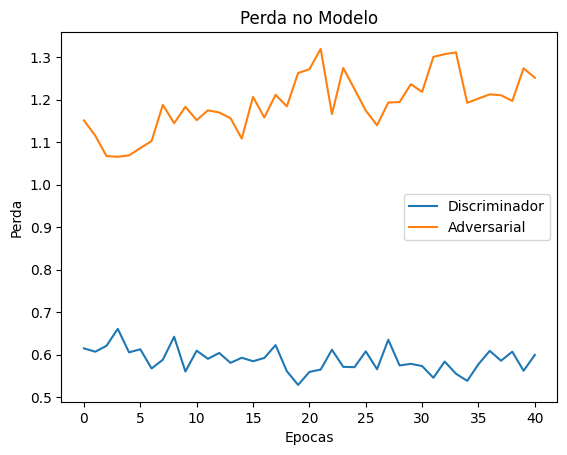

In [16]:
# Plotando metricas

plt.plot(d_loss)
plt.plot(d_g_loss)
plt.title("Perda no Modelo")
plt.ylabel("Perda")
plt.xlabel("Epocas")
plt.legend(["Discriminador", "Adversarial"], loc="center right")
plt.show()